# Minimal working examples:

For exhaustive details and further functionality, please see the comments on the function ```robust_nmf()``` in ```torch_functions.py``` or ```numpy_functions.py```.

This file implements everything in PyTorch. For NumPy, just ```import numpy```, replace all instances of ```torch``` with ```numpy``` and remove the ```.cuda()``` suffix.

# Switching between backends:

In [1]:
# Setting paths such that this notebook can see the relevant files.
import sys
sys.path.append("..")

import numpy as np
from backends.numpy_functions import robust_nmf
import scipy.io as sio

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import itertools

In [2]:
data = sio.loadmat("../data/Urban_R162.mat")['Y']


In [3]:
basis, coeff, outlier, obj = robust_nmf(data,
                                        rank=6,
                                        beta=1.5,
                                        init='NMF',
                                        reg_val=1,
                                        sum_to_one=0,
                                        tol=1e-7,
                                        max_iter=50)

Initializing rNMF with NMF.
violation: 1.0
violation: 0.5124898921482347
violation: 0.21072494097266098
violation: 0.11639387036183667
violation: 0.07026284575473826
violation: 0.04945137368097459
violation: 0.038741106818656536
violation: 0.03251864415287527
violation: 0.028674305613667957
violation: 0.026150077391199816
violation: 0.024318515400667852
violation: 0.022823402489861797
violation: 0.021426186892138727
violation: 0.020039499743606713
violation: 0.01867892871666014
violation: 0.017366626857556217
violation: 0.016123883747523805
violation: 0.014985515055660188
violation: 0.013966252636894697
violation: 0.013057591694322638
violation: 0.01224898180911739
violation: 0.011539299862521401
violation: 0.010913998304005862
violation: 0.010359406761318381
violation: 0.009881201914511351
violation: 0.009456996117309473
violation: 0.009084767210144487
violation: 0.008755226228767423
violation: 0.008469109830761951
violation: 0.008221394875593745
violation: 0.00800801293751066
violati

/Users/kennethmitchell/miniconda3/envs/rnmf_torch/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Iter = 0; Obj = 22877939.332935177
Iter = 1; Obj = 22185240.418120254; Err = 0.0302780291849848
Iter = 11; Obj = 20160035.47821058; Err = 0.008005853566421257
Iter = 21; Obj = 18691348.78184564; Err = 0.0072423547316911524
Iter = 31; Obj = 17434474.87091555; Err = 0.006691134165152092
Iter = 41; Obj = 16353942.402298825; Err = 0.00609211067512991
Maximum number of iterations achieved


Output:
1. basis: basis matrix of the factorization.
2. coeff: coefficient matrix of the factorization.
3. outlier: sparse outlier matrix.
4. obj: objective function progress.

In [4]:
H = coeff
W = basis

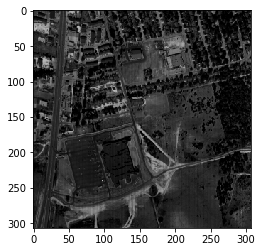

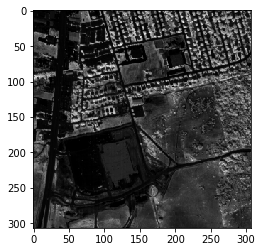

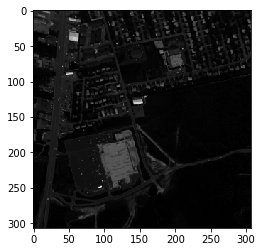

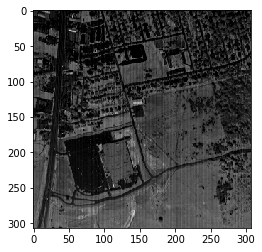

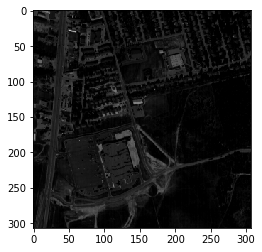

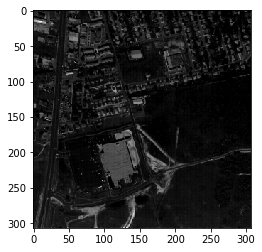

In [5]:
for i in range(0,6):
    fst_row = H[i]
    fst_image = H[i].reshape((307, 307))

    plt.imshow(fst_image, cmap='gray', interpolation='nearest')
    plt.show()

In [6]:
wavelength = sio.loadmat("../data/Urban_R162.mat")["SlectBands"]

def radiation_expected(wavelength):
    return 3.8 * 10**8 / wavelength

def convertWToReflectivity(W):
    if(len(wavelength) != len(W)): return None
    newW = []

    for i in range(len(W)):
        newRow = []
        for j in range(len(W[i])):
            val =( W[i][j] / radiation_expected(wavelength[i])) * 100
            newRow += [val]
        newW += [newRow]

    newW = np.array(newW)[:,:,0]
    return newW

def plot_endmembers(W, n_comps, title="Endmembers"):
    W_t = W.transpose()
    bands = range(162)
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    plt.xlabel("Bands")
    plt.ylabel("Reflectance")
    plt.title(title)
    for i in range(n_comps):
        plt.plot(bands, W_t[i], color = colors[i])
    plt.show()

(162, 6)
(162, 6)


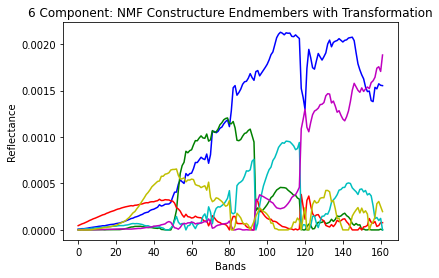

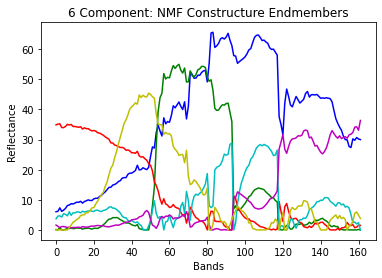

In [7]:
print(W.shape)

W_reflection = convertWToReflectivity(W)
# print(W_reflection)
print(W_reflection.shape)

plot_endmembers(W_reflection, 6, title="6 Component: NMF Constructure Endmembers with Transformation")
plot_endmembers(W, 6, title="6 Component: NMF Constructure Endmembers")



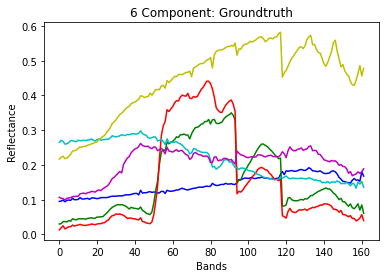

In [8]:
hs_image = sio.loadmat("../data/groundTruth_Urban_end6/end6_groundTruth.mat")

W_gt6 = hs_image["M"]
plot_endmembers(W_gt6, 6, title="6 Component: Groundtruth")



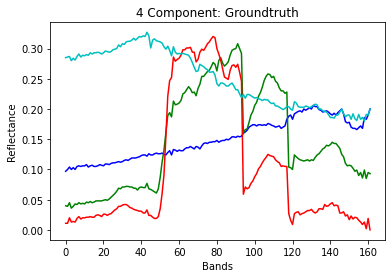

In [9]:
hs_image = sio.loadmat("../data/groundTruth/end4_groundTruth.mat")

W_gt4 = hs_image["M"]
plot_endmembers(W_gt4, 4, title="4 Component: Groundtruth")


In [19]:

# Get all permutations of the rows of W_reflection
perms = list(itertools.permutations(W_reflection.transpose()))

# Calculate RMS for each permutation
rms_list = []
for perm in perms:
    rms = mean_squared_error(W_gt6.transpose(), perm, squared=False)
    rms_list.append(rms)

# Find the permutation with the lowest RMS
min_rms = min(rms_list)
min_perm = perms[rms_list.index(min_rms)]

print("Minimum RMS:", min_rms)


Minimum RMS: 0.2523584143481761
